In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设你已经有一个函数来加载文件夹中的数据
def load_time_series_data(folder_path):
    # 这里应该是加载数据的代码
    data = pd.read_csv(folder_path,encoding='gbk')
    mask = data['脑电连接信号是否正常'] != 0
    data = data[~mask]
    data = data.reset_index(drop=True)
    time_series_data = data.iloc[:,3:13]
    return time_series_data

def calculate_correlation_matrix(time_series_data):
    # 计算数据的相关性矩阵
    return time_series_data.corr(method='pearson')



             专注度        放松     Delta     Theta    Alpha1    Alpha2     Beta1  \
专注度     1.000000 -0.031855 -0.037968 -0.166537 -0.129632 -0.145121  0.011479   
放松     -0.031855  1.000000 -0.092726 -0.184910  0.172276  0.247420 -0.025584   
Delta  -0.037968 -0.092726  1.000000  0.461427  0.312211  0.221837  0.380573   
Theta  -0.166537 -0.184910  0.461427  1.000000  0.422591  0.351038  0.476404   
Alpha1 -0.129632  0.172276  0.312211  0.422591  1.000000  0.394014  0.452233   
Alpha2 -0.145121  0.247420  0.221837  0.351038  0.394014  1.000000  0.427355   
Beta1   0.011479 -0.025584  0.380573  0.476404  0.452233  0.427355  1.000000   
Beta2   0.138756 -0.025774  0.403785  0.521699  0.484414  0.447731  0.622630   
Gamma1  0.048511 -0.056904  0.383230  0.496721  0.419544  0.360283  0.530014   
Gamma2  0.013007 -0.037324  0.341576  0.443996  0.414109  0.370626  0.484255   

           Beta2    Gamma1    Gamma2  
专注度     0.138756  0.048511  0.013007  
放松     -0.025774 -0.056904 -0.037324  
De

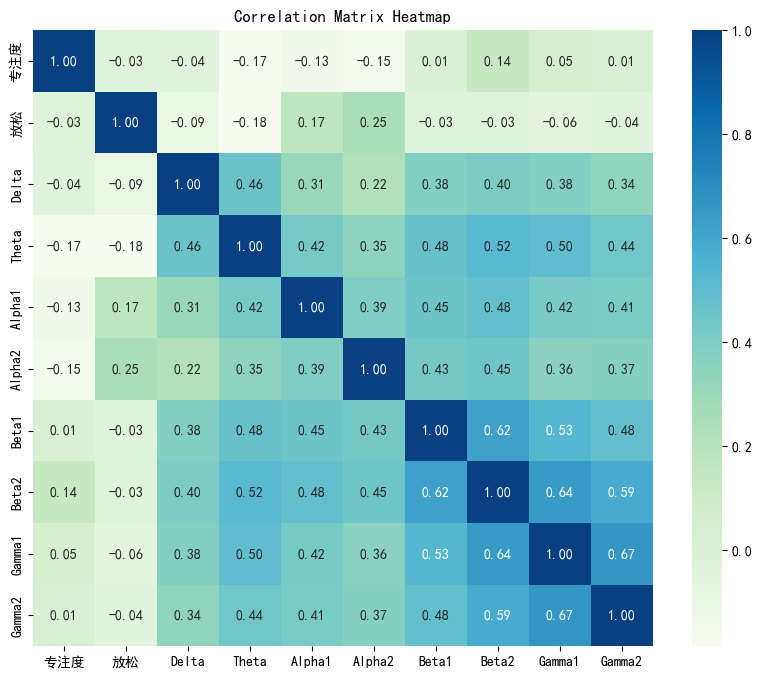

In [10]:
# 加载的全部数据
folder_paths = ['./脑电波数据/A1.csv','./脑电波数据/A3.csv','./脑电波数据/A5.csv','./脑电波数据/A7.csv',
                './脑电波数据/A10.csv','./脑电波数据/A11.csv','./脑电波数据/A12.csv','./脑电波数据/A15.csv',
                './脑电波数据/A16.csv','./脑电波数据/A17.csv','./脑电波数据/A18.csv','./脑电波数据/A19.csv',
                './脑电波数据/A23.csv','./脑电波数据/A24.csv','./脑电波数据/A2.csv','./脑电波数据/A4.csv','./脑电波数据/A6.csv','./脑电波数据/A8.csv',
                './脑电波数据/A9.csv','./脑电波数据/A13.csv','./脑电波数据/A14.csv','./脑电波数据/A20.csv',
                './脑电波数据/A22.csv','./脑电波数据/A25.csv',]  # 25个文件夹的路径列表
correlation_matrices = []

for folder_path in folder_paths:
    data = load_time_series_data(folder_path)
    corr_matrix = calculate_correlation_matrix(data)
    correlation_matrices.append(corr_matrix)
# print(correlation_matrices)

# 这里你可以对每个文件夹的相关性矩阵进行进一步分析
# 例如，你可以计算所有文件夹相关性矩阵的平均值
average_corr_matrix = np.mean(correlation_matrices, axis=0)
average_corr_matrix_df = pd.DataFrame(average_corr_matrix,
                                      index=["专注度","放松","Delta","Theta","Alpha1","Alpha2","Beta1","Beta2","Gamma1","Gamma2"],
                                      columns=["专注度","放松","Delta","Theta","Alpha1","Alpha2","Beta1","Beta2","Gamma1","Gamma2"])
# average_corr_matrix_df.index_labels = ["Delta","Theta","Alpha1","Alpha2","Beta1","Beta2","Gamma1","Gamma2"]  # 假设有这些标签
# average_corr_matrix_df.column_labels = average_corr_matrix_df.index_labels[:]  # 通常列标签和索引标签相同
print(average_corr_matrix_df)
# print(average_corr_matrix)
# 可视化平均相关性矩阵
# import seaborn as sns
# sns.heatmap(average_corr_matrix, annot=True)
from matplotlib.font_manager import FontProperties

# 设置中文字体路径，例如使用'SimHei'字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

plt.figure(figsize=(10, 8))  # 可以根据需要调整图形大小
sns.heatmap(average_corr_matrix_df, annot=True, fmt=".2f", cmap='GnBu', cbar=True)
plt.title('Correlation Matrix Heatmap')  # 标题
plt.show()


           Delta     Theta    Alpha1    Alpha2     Beta1     Beta2    Gamma1  \
Delta   1.000000  0.442582  0.315135  0.229278  0.365015  0.377404  0.361648   
Theta   0.442582  1.000000  0.435657  0.380406  0.469950  0.494951  0.457854   
Alpha1  0.315135  0.435657  1.000000  0.448572  0.497666  0.516783  0.471640   
Alpha2  0.229278  0.380406  0.448572  1.000000  0.460860  0.476022  0.395830   
Beta1   0.365015  0.469950  0.497666  0.460860  1.000000  0.617808  0.532151   
Beta2   0.377404  0.494951  0.516783  0.476022  0.617808  1.000000  0.634907   
Gamma1  0.361648  0.457854  0.471640  0.395830  0.532151  0.634907  1.000000   
Gamma2  0.332595  0.419602  0.460598  0.417806  0.486190  0.588569  0.672760   

          Gamma2  
Delta   0.332595  
Theta   0.419602  
Alpha1  0.460598  
Alpha2  0.417806  
Beta1   0.486190  
Beta2   0.588569  
Gamma1  0.672760  
Gamma2  1.000000  


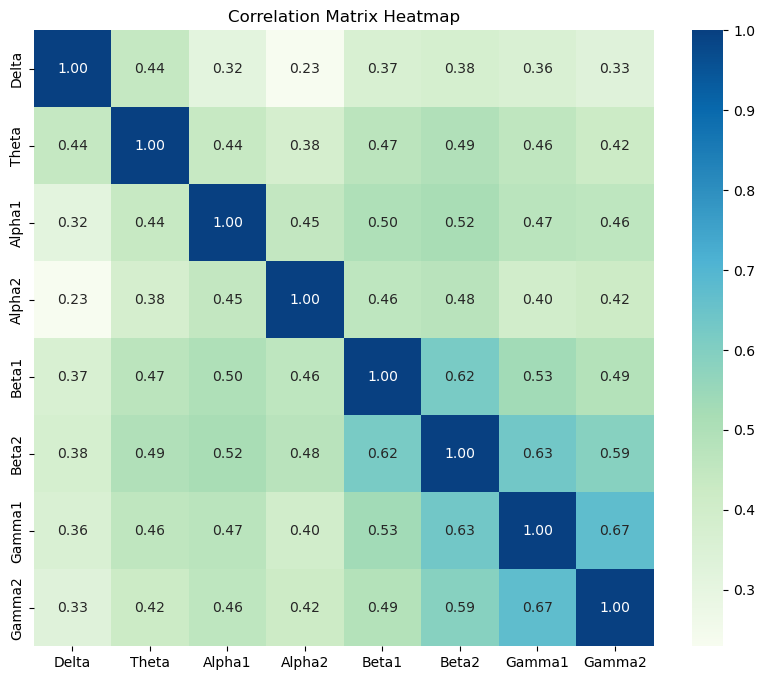

In [3]:
# 加载所有PCL=0的数据
folder_paths = ['./脑电波数据/A1.csv','./脑电波数据/A3.csv','./脑电波数据/A5.csv','./脑电波数据/A7.csv',
                './脑电波数据/A10.csv','./脑电波数据/A11.csv','./脑电波数据/A12.csv','./脑电波数据/A15.csv',
                './脑电波数据/A16.csv','./脑电波数据/A17.csv','./脑电波数据/A18.csv','./脑电波数据/A19.csv',
                './脑电波数据/A23.csv','./脑电波数据/A24.csv']  # 25个文件夹的路径列表
correlation_matrices = []

for folder_path in folder_paths:
    data = load_time_series_data(folder_path)
    corr_matrix = calculate_correlation_matrix(data)
    correlation_matrices.append(corr_matrix)
# print(correlation_matrices)

# 这里你可以对每个文件夹的相关性矩阵进行进一步分析
# 例如，你可以计算所有文件夹相关性矩阵的平均值
average_corr_matrix = np.mean(correlation_matrices, axis=0)
average_corr_matrix_df = pd.DataFrame(average_corr_matrix,
                                      index=["Delta","Theta","Alpha1","Alpha2","Beta1","Beta2","Gamma1","Gamma2"],
                                      columns=["Delta","Theta","Alpha1","Alpha2","Beta1","Beta2","Gamma1","Gamma2"])
# average_corr_matrix_df.index_labels = ["Delta","Theta","Alpha1","Alpha2","Beta1","Beta2","Gamma1","Gamma2"]  # 假设有这些标签
# average_corr_matrix_df.column_labels = average_corr_matrix_df.index_labels[:]  # 通常列标签和索引标签相同
print(average_corr_matrix_df)
# print(average_corr_matrix)
# 可视化平均相关性矩阵
# import seaborn as sns
# sns.heatmap(average_corr_matrix, annot=True)

plt.figure(figsize=(10, 8))  # 可以根据需要调整图形大小
sns.heatmap(average_corr_matrix_df, annot=True, fmt=".2f", cmap='GnBu', cbar=True)
plt.title('Correlation Matrix Heatmap')  # 标题
plt.show()


           Delta     Theta    Alpha1    Alpha2     Beta1     Beta2    Gamma1  \
Delta   1.000000  0.487811  0.308117  0.211421  0.402355  0.440718  0.413446   
Theta   0.487811  1.000000  0.404298  0.309924  0.485439  0.559145  0.551134   
Alpha1  0.308117  0.404298  1.000000  0.317632  0.388626  0.439097  0.346610   
Alpha2  0.211421  0.309924  0.317632  1.000000  0.380449  0.408123  0.310519   
Beta1   0.402355  0.485439  0.388626  0.380449  1.000000  0.629380  0.527021   
Beta2   0.440718  0.559145  0.439097  0.408123  0.629380  1.000000  0.657377   
Gamma1  0.413446  0.551134  0.346610  0.310519  0.527021  0.657377  1.000000   
Gamma2  0.354148  0.478146  0.349025  0.304575  0.481547  0.583314  0.658191   

          Gamma2  
Delta   0.354148  
Theta   0.478146  
Alpha1  0.349025  
Alpha2  0.304575  
Beta1   0.481547  
Beta2   0.583314  
Gamma1  0.658191  
Gamma2  1.000000  


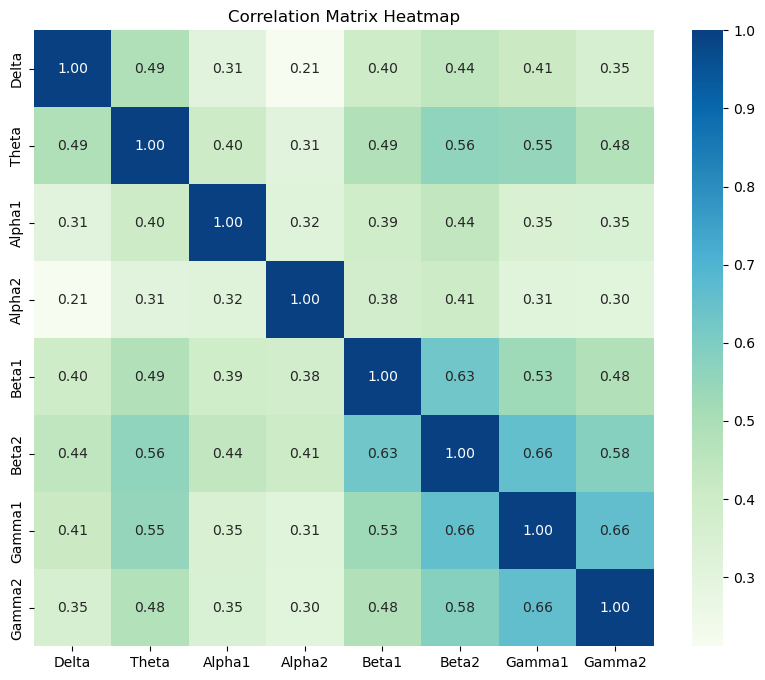

In [4]:
# 加载所有PCL>0的数据
folder_paths = ['./脑电波数据/A2.csv','./脑电波数据/A4.csv','./脑电波数据/A6.csv','./脑电波数据/A8.csv',
                './脑电波数据/A9.csv','./脑电波数据/A13.csv','./脑电波数据/A14.csv','./脑电波数据/A20.csv',
                './脑电波数据/A22.csv','./脑电波数据/A25.csv']  # 25个文件夹的路径列表
correlation_matrices = []

for folder_path in folder_paths:
    data = load_time_series_data(folder_path)
    corr_matrix = calculate_correlation_matrix(data)
    correlation_matrices.append(corr_matrix)
# print(correlation_matrices)

# 这里你可以对每个文件夹的相关性矩阵进行进一步分析
# 例如，你可以计算所有文件夹相关性矩阵的平均值
average_corr_matrix = np.mean(correlation_matrices, axis=0)
average_corr_matrix_df = pd.DataFrame(average_corr_matrix,
                                      index=["Delta","Theta","Alpha1","Alpha2","Beta1","Beta2","Gamma1","Gamma2"],
                                      columns=["Delta","Theta","Alpha1","Alpha2","Beta1","Beta2","Gamma1","Gamma2"])
# average_corr_matrix_df.index_labels = ["Delta","Theta","Alpha1","Alpha2","Beta1","Beta2","Gamma1","Gamma2"]  # 假设有这些标签
# average_corr_matrix_df.column_labels = average_corr_matrix_df.index_labels[:]  # 通常列标签和索引标签相同
print(average_corr_matrix_df)
# print(average_corr_matrix)
# 可视化平均相关性矩阵
# import seaborn as sns
# sns.heatmap(average_corr_matrix, annot=True)

plt.figure(figsize=(10, 8))  # 可以根据需要调整图形大小
sns.heatmap(average_corr_matrix_df, annot=True, fmt=".2f", cmap='GnBu', cbar=True)
plt.title('Correlation Matrix Heatmap')  # 标题
plt.show()
